In [1]:
import sys
sys.path.append("../")
from mir.common import SegmentLibrary
from mir.distances import aligner

In [2]:
lib = SegmentLibrary.load_default(genes = ['TRA', 'TRB'])
print(lib.get_summary())
print(lib.get_genes())

Counter({('HomoSapiens', 'TRA', 'J'): 49, ('HomoSapiens', 'TRB', 'V'): 48, ('HomoSapiens', 'TRA', 'V'): 45, ('HomoSapiens', 'TRB', 'J'): 13, ('HomoSapiens', 'TRB', 'D'): 2})
{'TRB', 'TRA'}


In [3]:
seqs = lib.get_seqaas('TRB', 'V')
print(seqs[0:3])

[('TRBV10-1*01', 'DAEITQSPRHKITETGRQVTLACHQTWNHNNMFWYRQDLGHGLRLIHYSYGVQDTNKGEVSDGYSVSRSNTEDLPLTLESAASSQTSVYFCASSE'), ('TRBV10-2*01', 'DAGITQSPRYKITETGRQVTLMCHQTWSHSYMFWYRQDLGHGLRLIYYSAAADITDKGEVPDGYVVSRSKTENFPLTLESATRSQTSVYFCASSE'), ('TRBV10-3*01', 'DAGITQSPRHKVTETGTPVTLRCHQTENHRYMYWYRQDPGHGLRLIHYSYGVKDTDKGEVSDGYSVSRSKTEDFLLTLESATSSQTSVYFCAISE')]


In [4]:
galn = aligner.GermlineAligner.from_seqs(seqs)
print(galn.dist)
print(galn.score_norm('TRBV10-1*01', 'TRBV10-1*01'))
print(galn.score_norm('TRBV10-1*01', 'TRBV10-2*01'))

DAEITQSPRHKITETGRQVTLACHQTWNHNNMFWYRQDLGHGLRLIHYSYGVQDTNKGEVSDGYSVSRSNTEDLPLTLESAASSQTSVYFCASSE DAEITQSPRHKITETGRQVTLACHQTWNHNNMFWYRQDLGHGLRLIHYSYGVQDTNKGEVSDGYSVSRSNTEDLPLTLESAASSQTSVYFCASSE
DAGITQSPRYKITETGRQVTLMCHQTWSHSYMFWYRQDLGHGLRLIYYSAAADITDKGEVPDGYVVSRSKTENFPLTLESATRSQTSVYFCASSE DAEITQSPRHKITETGRQVTLACHQTWNHNNMFWYRQDLGHGLRLIHYSYGVQDTNKGEVSDGYSVSRSNTEDLPLTLESAASSQTSVYFCASSE
DAGITQSPRYKITETGRQVTLMCHQTWSHSYMFWYRQDLGHGLRLIYYSAAADITDKGEVPDGYVVSRSKTENFPLTLESATRSQTSVYFCASSE DAGITQSPRYKITETGRQVTLMCHQTWSHSYMFWYRQDLGHGLRLIYYSAAADITDKGEVPDGYVVSRSKTENFPLTLESATRSQTSVYFCASSE
DAGITQSPRHKVTETGTPVTLRCHQTENHRYMYWYRQDPGHGLRLIHYSYGVKDTDKGEVSDGYSVSRSKTEDFLLTLESATSSQTSVYFCAISE DAEITQSPRHKITETGRQVTLACHQTWNHNNMFWYRQDLGHGLRLIHYSYGVQDTNKGEVSDGYSVSRSNTEDLPLTLESAASSQTSVYFCASSE
DAGITQSPRHKVTETGTPVTLRCHQTENHRYMYWYRQDPGHGLRLIHYSYGVKDTDKGEVSDGYSVSRSKTEDFLLTLESATSSQTSVYFCAISE DAGITQSPRYKITETGRQVTLMCHQTWSHSYMFWYRQDLGHGLRLIYYSAAADITDKGEVPDGYVVSRSKTENFPLTLESATRSQTSVYFCASSE
DAGITQSPRHKVTETGTPVTLRCHQTENHRYMYWYRQDPG

In [5]:
import pandas as pd
df = pd.DataFrame([(g1, g2, s, galn.score_norm(g1, g2)) for ((g1, g2), s) in galn.dist.items()], 
                  columns = ['Segm1', 'Segm2', 'Score', 'Score_norm'])
print(df)

            Segm1        Segm2  Score  Score_norm
0     TRBV10-1*01  TRBV10-1*01  510.0         0.0
1     TRBV10-2*01  TRBV10-1*01  395.0      -115.0
2     TRBV10-2*01  TRBV10-2*01  507.0         0.0
3     TRBV10-3*01  TRBV10-1*01  408.0      -103.0
4     TRBV10-3*01  TRBV10-2*01  377.0      -134.0
...           ...          ...    ...         ...
2299   TRBV7-4*01     TRBV9*01  172.0      -321.0
2300   TRBV7-6*01     TRBV9*01  194.0      -311.0
2301   TRBV7-7*01     TRBV9*01  190.0      -315.0
2302   TRBV7-8*01     TRBV9*01  182.0      -316.0
2303   TRBV7-9*01     TRBV9*01  213.0      -294.0

[2304 rows x 4 columns]


In [6]:
import re
import seaborn as sns
df_sfam = pd.DataFrame([(g, re.split('[-\\*]', g)[0]) for (g, s) in seqs],
                       columns = ['Segm', 'Fam'])

codes, uniques = pd.factorize(df_sfam['Fam'])
palette = zip(uniques, sns.color_palette(None, len(uniques)).as_hex())
df_sfam = df_sfam.merge(pd.DataFrame(palette, columns = ['Fam', 'Col']))
cols = dict(df_sfam[['Segm', 'Col']].itertuples(index=False))

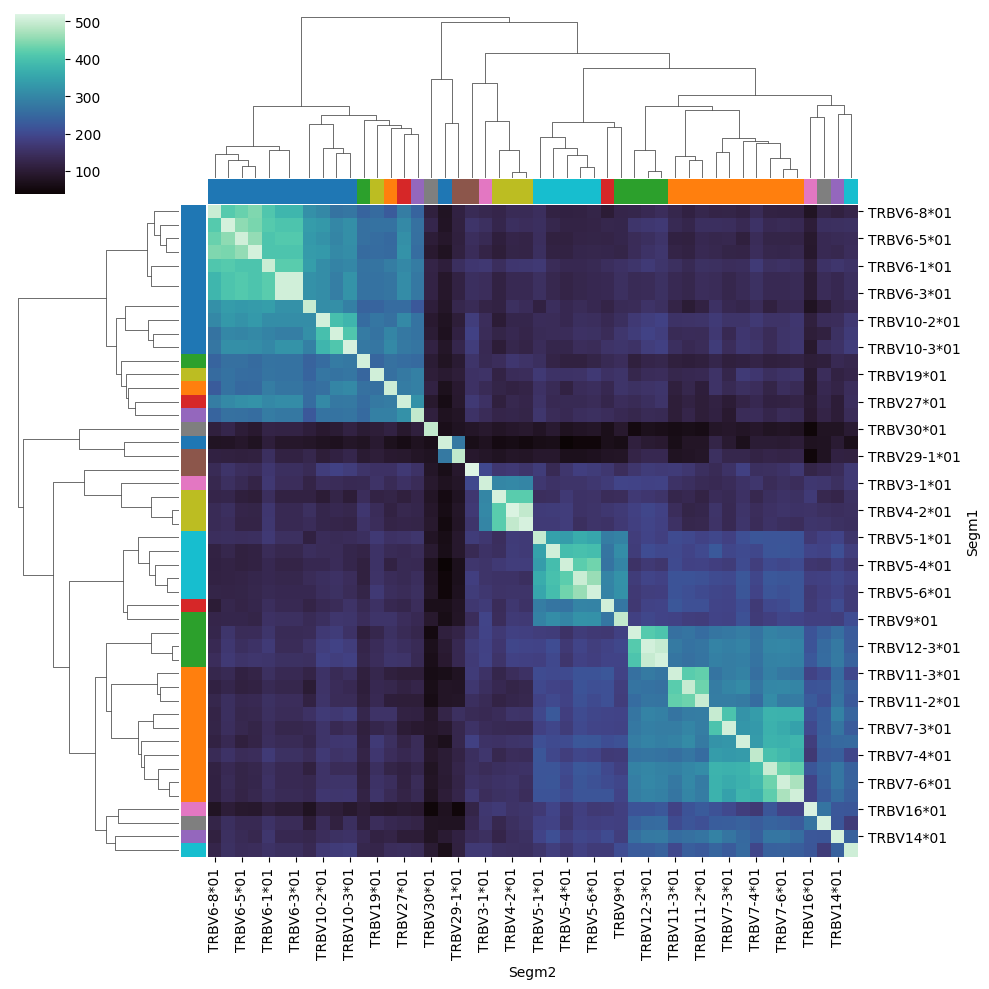

In [7]:
df1 = df.pivot(index = "Segm1", columns = "Segm2", values = "Score")
sns.clustermap(df1, cmap="mako", 
               row_colors=df1.index.map(cols),
               col_colors=df1.index.map(cols))

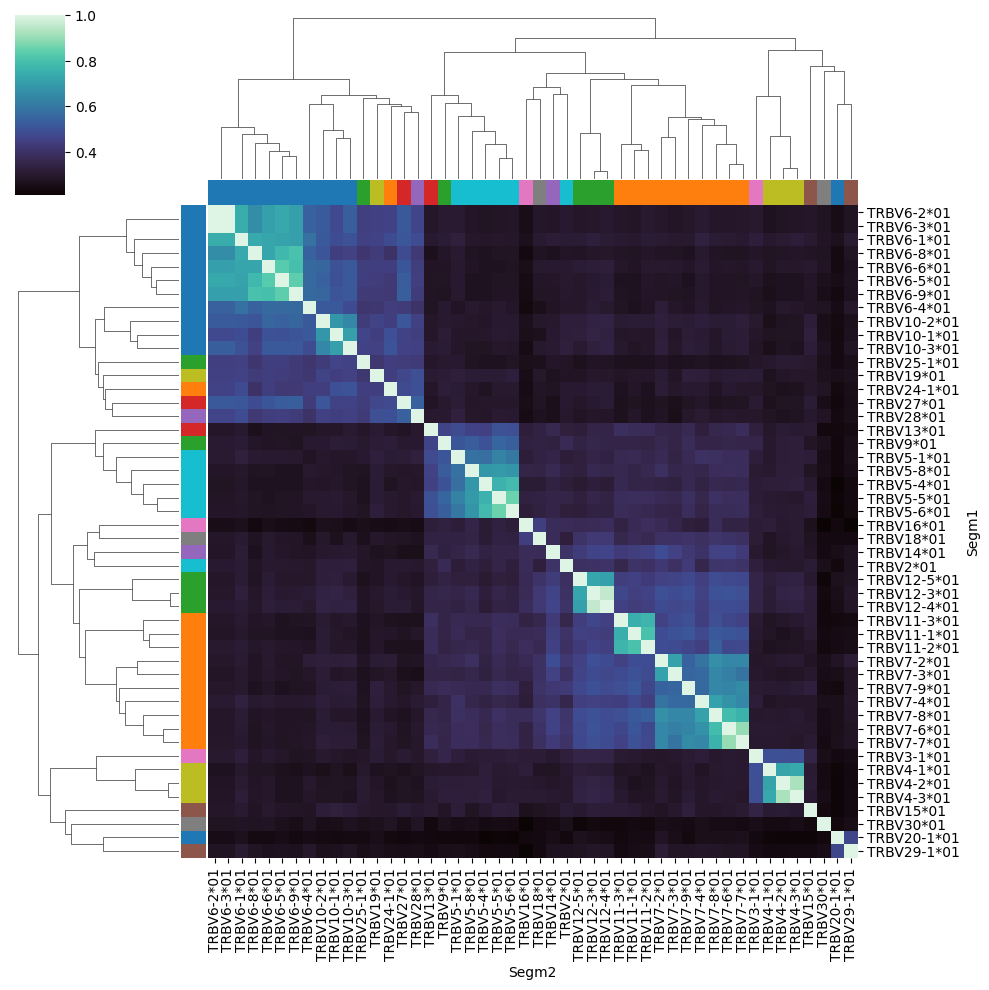

In [8]:
from numpy import exp
df2 = df.pivot(index = "Segm1", columns = "Segm2", values = "Score_norm")
sns.clustermap(exp(df2/300), cmap="mako", 
               row_colors=df2.index.map(cols),
               col_colors=df2.index.map(cols), 
               xticklabels=True,
               yticklabels=True)